#  Analysis of the Yandex. Afisha service

##### Описание проекта

You were invited to an internship in the marketing analytics department of Yandex.Afisha. The first task: to help marketers reduce costs-to abandon unprofitable sources of traffic and reallocate the budget.
There is data from Yandex. Afisha from June 2017 to the end of May 2018:
the server log with data on visits to the Yandex. Afisha site,
unloading of all orders for this period,
statistics of advertising expenses.
You will have to learn:
how customers use the service
when they make their first purchases on the site,
how much money each customer brings to the company,
when the cost of attracting a customer pays off.
Revenue is measured in conventional units-Yandex units.

* [Этап 1. Установка библиотек, чтение файлов](#1-bullet)
* [Этап 2. Расчет метрик](#2-bullet)
* [Этап 3. Вывод.](#3-bullet)

## Установка библиотек, чтение файлов

In [2]:
pip install seaborn==0.11.0 

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 283 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install data_view

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for data-view: filename=data_view-0.2.0-py3-none-any.whl size=5367 sha256=c98fde7e3021407ae079a78efcdffb22b2dfddbcf5c3286f376caded38ca0180
  Stored in directory: /home/jovyan/.cache/pip/wheels/45/ac/9f/728bf8fd260c161c8e1e848ecd1388eaa81b8c5afe4a3849da
Successfully built data-view
Note: you may need to restart the kernel to use updated packages.


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> У Меня все работает, все устанавливается, вроде версия самая последняя, что может быть не так? <div> 

In [4]:
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
from data_view import *
import datetime

Чтение файлов

In [5]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [6]:
list_of_df = [visits, orders, costs]

In [7]:
for i in list_of_df:
    view(i, only_numeric=False, histograms=False)

Размер данных: (359400, 5)

Обзор первых/последних строк данных
----------------------------------------------------------------------------------------------------


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485
359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559



Типы данных и кол-во непустых строк
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


""



Наличие дат (месяц, год, день) или id в названиях столбцов
----------------------------------------------------------------------------------------------------


,Текущий тип,Рекомендуемый тип
Имя,,
Source Id,int64,int
Uid,uint64,int



Кол-во пропусков в данных
----------------------------------------------------------------------------------------------------


,Пропуски,"Пропуски, %"
Имя,,
Device,0,0
End Ts,0,0
Source Id,0,0
Start Ts,0,0
Uid,0,0



Кол-во дубликатов в данных
----------------------------------------------------------------------------------------------------
0

Описательные статистики числовых признаков
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,number_of_outliers
Source Id,359400,3.750515e+00,1.917116e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,1.000000e+01,23302
Uid,359400,9.202557e+18,5.298433e+18,1.186350e+13,4.613407e+18,9.227413e+18,1.372824e+19,1.844668e+19,0



Описательные статистики категориальных признаков
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
Device,359400,2,desktop,262567
End Ts,359400,224760,2017-11-24 16:51:00,23
Start Ts,359400,224303,2017-11-24 16:06:00,19




Топ-5 уникального категориального признака
----------------------------------------------------------------------------------------------------


,Device_name,Device_count,End Ts_name,End Ts_count,Start Ts_name,Start Ts_count
0,desktop,262567,2017-11-24 16:51:00,23,2017-11-24 16:06:00,19
1,touch,96833,2017-11-24 16:52:00,21,2017-11-24 17:21:00,15
2,0,-1,2017-11-24 16:50:00,18,2018-05-31 10:01:00,15
3,0,-1,2017-11-24 16:46:00,15,2017-11-24 17:19:00,15
4,0,-1,2017-11-24 16:48:00,14,2017-11-24 16:05:00,14




Статистики при группировке по некоторым категориям
----------------------------------------------------------------------------------------------------
Группировка по: Device


,Source Id,Uid
Device,,
desktop,262567,262567
touch,96833,96833




Матрица корреляций
----------------------------------------------------------------------------------------------------


,Source Id,Uid
Source Id,1,-0.0055413
Uid,-0.0055413,1


Размер данных: (50415, 3)

Обзор первых/последних строк данных
----------------------------------------------------------------------------------------------------


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366



Типы данных и кол-во непустых строк
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


""



Наличие дат (месяц, год, день) или id в названиях столбцов
----------------------------------------------------------------------------------------------------


,Текущий тип,Рекомендуемый тип
Имя,,
Uid,uint64,int



Кол-во пропусков в данных
----------------------------------------------------------------------------------------------------


,Пропуски,"Пропуски, %"
Имя,,
Buy Ts,0,0
Revenue,0,0
Uid,0,0



Кол-во дубликатов в данных
----------------------------------------------------------------------------------------------------
0

Описательные статистики числовых признаков
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,number_of_outliers
Revenue,50415,4.999647e+00,2.181836e+01,0.000000e+00,1.220000e+00,2.500000e+00,4.890000e+00,2.633280e+03,3990
Uid,50415,9.098161e+18,5.285742e+18,3.135781e+14,4.533567e+18,9.102274e+18,1.368290e+19,1.844617e+19,0



Описательные статистики категориальных признаков
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
Buy Ts,50415,45991,2018-05-31 10:13:00,9




Топ-5 уникального категориального признака
----------------------------------------------------------------------------------------------------


,Buy Ts_name,Buy Ts_count
0,2018-05-31 10:13:00,9
1,2017-11-24 17:42:00,8
2,2017-11-24 17:36:00,7
3,2018-05-31 10:27:00,7
4,2018-05-31 10:02:00,7




Статистики при группировке по некоторым категориям
----------------------------------------------------------------------------------------------------
Категориальные признаки содержат более 5 уникальных элементов!


Матрица корреляций
----------------------------------------------------------------------------------------------------


,Revenue,Uid
Revenue,1,-0.00209247
Uid,-0.00209247,1


Размер данных: (2542, 3)

Обзор первых/последних строк данных
----------------------------------------------------------------------------------------------------


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60



Типы данных и кол-во непустых строк
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


""



Наличие дат (месяц, год, день) или id в названиях столбцов
----------------------------------------------------------------------------------------------------


,Текущий тип,Рекомендуемый тип
Имя,,
source_id,int64,int



Кол-во пропусков в данных
----------------------------------------------------------------------------------------------------


,Пропуски,"Пропуски, %"
Имя,,
source_id,0,0
dt,0,0
costs,0,0



Кол-во дубликатов в данных
----------------------------------------------------------------------------------------------------
0

Описательные статистики числовых признаков
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max,number_of_outliers
source_id,2542,4.857199,3.181581,1.00,2.000,4.000,9.000,10.00,0
costs,2542,129.477427,156.296628,0.54,21.945,77.295,170.065,1788.28,189



Описательные статистики категориальных признаков
----------------------------------------------------------------------------------------------------


,count,unique,top,freq
dt,2542,364,2018-04-05,7




Топ-5 уникального категориального признака
----------------------------------------------------------------------------------------------------


,dt_name,dt_count
0,2018-04-05,7
1,2017-10-21,7
2,2018-02-12,7
3,2018-02-07,7
4,2017-08-16,7




Статистики при группировке по некоторым категориям
----------------------------------------------------------------------------------------------------
Категориальные признаки содержат более 5 уникальных элементов!


Матрица корреляций
----------------------------------------------------------------------------------------------------


,source_id,costs
source_id,1,-0.361901
costs,-0.361901,1


Благодаря данному алгоритму можно заметить, что ы двнных нет пропусков, не соответсвуют типу данных только даты, которые почти везде записаны в формате Object, это предстоит исправить

In [8]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])


In [9]:
# for i in range(len(visits)):
#     visits['wrong_date_check'] = visits.loc[i, 'Start Ts'] > visits.loc[i, 'End Ts']

In [10]:
# visits['wrong_date_check'].value_counts()

Получается, строк с неправильной датой нет

In [11]:
orders.loc[orders['Revenue']<=0, 'Revenue'].count()

51

А вот строк с нулевым значением Revenue есть 51, создам новую таблицу orders_2, которая не будет в себя включать эти значения

In [12]:
orders_2 = orders.loc[orders['Revenue'] > 0]

In [13]:
orders_2.loc[orders['Revenue']<=0, 'Revenue'].count()

0

Приведу названия столбцов к более удобному виду

In [14]:
visits_names = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
orders_names = ['buy_ts', 'revenue', 'uid']
costs_names = ['source_id', 'dt', 'costs']

In [15]:
visits.set_axis(visits_names, axis = 'columns',inplace = True)
orders_2.set_axis(orders_names, axis = 'columns',inplace = True)
costs.set_axis(costs_names, axis = 'columns',inplace = True)


In [16]:
orders.set_axis(orders_names, axis = 'columns',inplace = True)

Типы данных изменены, можно переходить к расчету метрик.

## Расчет метрик

Расчет продуктовых метрик

Рассчитаем DAU, WAU и MAU для датафрейма visits. Вычислим средние значения этих метрик за весь период, а также построим график изменения метрик во времени

In [17]:
display(visits.head(5))

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Выделим в отедльные столбцы неделю, месяц, год и дату

In [18]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits['day_of_week'] = visits['start_ts'].dt.dayofweek

In [19]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()

In [20]:
print('dau =', int(dau_total))
print()
print('wau = ', int(wau_total))
print()
print('mau = ', int(mau_total))

dau = 907

wau =  5716

mau =  23228


In [21]:
visits_2017 = visits.loc[visits['session_year'] == 2017]

In [22]:
visits_2018 = visits.loc[visits['session_year'] == 2018]

In [23]:
wau_split_2017 = visits_2017.groupby('session_week').agg({'uid': 'nunique'})
wau_split_2018 = visits_2018.groupby('session_week').agg({'uid': 'nunique'})

Text(0.5, 1.0, 'количество пользователей по неделям в 2017 году')

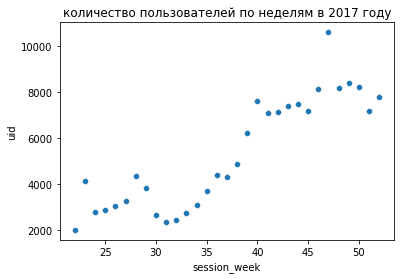

In [24]:
sns.scatterplot(data=wau_split_2017, x='session_week', y='uid')
plt.title('количество пользователей по неделям в 2017 году')

По неделям видно, что пользователей становится больше к концу года, а именно к 45-50 неделе, в то время как в начале года 2017 этот показатель был очень маленьким.

Text(0.5, 1.0, 'количество пользователей по неделям в 2018 году')

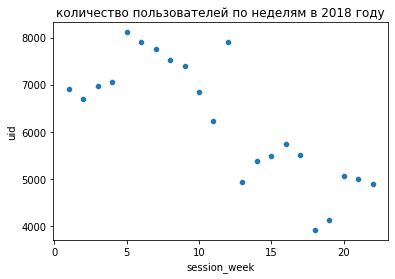

In [25]:
sns.scatterplot(data=wau_split_2018, x='session_week', y='uid')
plt.title('количество пользователей по неделям в 2018 году')

А для 2018 года наоборот - в начале года пользователей было очень много и к середине они убывают, в новогодние каникулы люди охотнее посещают подобные сайты.

In [26]:
mau_split_2017 = visits_2017.groupby('session_month').agg({'uid': 'nunique'})
mau_split_2018 = visits_2018.groupby('session_month').agg({'uid': 'nunique'})

Text(0.5, 1.0, 'количество пользователей по месяцам в 2017 году')

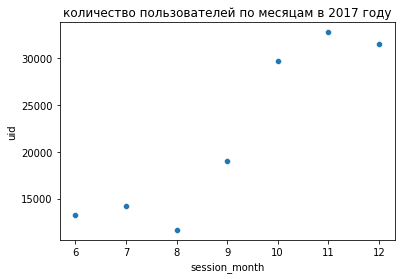

In [27]:
sns.scatterplot(data=mau_split_2017, x='session_month', y='uid')
plt.title('количество пользователей по месяцам в 2017 году')

Text(0.5, 1.0, 'количество пользователей по месяцам в 2018 году')

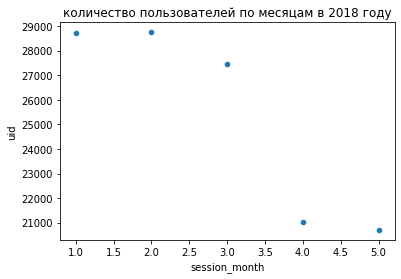

In [28]:
sns.scatterplot(data=mau_split_2018, x='session_month', y='uid')
plt.title('количество пользователей по месяцам в 2018 году')

In [29]:
dau_of_week_split_2017 = visits_2017.groupby('day_of_week').agg({'uid': 'nunique'})
dau_of_week_split_2018 = visits_2018.groupby('day_of_week').agg({'uid': 'nunique'})

Очевидно, что картина по месяуам не может противоречить тому, что показали недели, чем ближе месяц к новому году - тем больше посетителей

Text(0.5, 1.0, 'количество пользователей по дням недели в 2017 году')

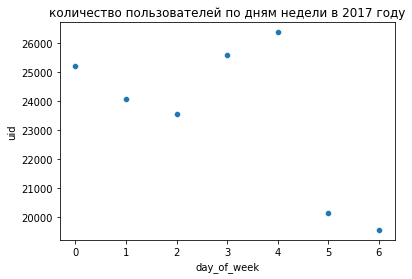

In [30]:
sns.scatterplot(data=dau_of_week_split_2017, x='day_of_week', y='uid')
plt.title('количество пользователей по дням недели в 2017 году')

Text(0.5, 1.0, 'количество пользователей по дням недели в 2018 году')

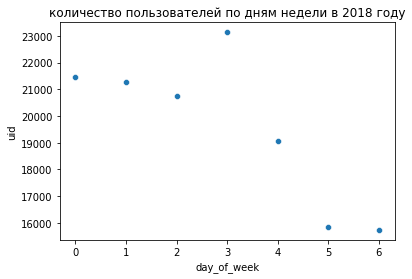

In [31]:
sns.scatterplot(data=dau_of_week_split_2018, x='day_of_week', y='uid')
plt.title('количество пользователей по дням недели в 2018 году')

По дням недели интересно - больше всего посетителей в 2017 году по четвергам и пятницам, а на выходных их почти нет, а в 2018 году четверг остался популярным, а вот пятница опустилась на третье место с конца

Итак - количество уникальных посетителей в день(метрика DAU) равняется 907, количество уникальных пользователей в неделю(WAU) - 5716, количество уникальных пользователей в месяц(MAU) - 23228. На первый взгляд - данные значительные, не имея знаний в этой области, не берусь судить о том, является суточная посещаемость в 907 человек большой, но вот 23228 человек в месяц кажутся не самой большой аудиторией, но она же и уникальная на то и уникальная.

Теперь посчитаем сколько раз в день в среднем на сайт заходит пользователей.

In [32]:
sessions_per_user = visits.groupby(['session_year', 'session_month']).agg({'uid': ['count','nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']


In [33]:
display(sessions_per_user) 

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         6                   16505    13259           1.244815
             7                   17828    14183           1.256998
             8                   14355    11631           1.234202
             9                   23907    18975           1.259921
             10                  37903    29692           1.276539
             11                  43969    32797           1.340641
             12                  41983    31557           1.330386
2018         1                   36939    28716           1.286356
             2                   37182    28749           1.293332
             3                   35679    27473           1.298693
             4                   26515    21008           1.262138
             5                   26635    20701           1.286653

Сессий на одного пользователя не очень много, всего примерно 1.25, зато стабильно в каждом месяце на протяжении 2 лет.  А вот по количеству сессий все по-другому: мы видим, что пик приходится на конец года 2017, негде гулять, люди ищут более теплые развлечения.

Посчитаем ASL(Средняя продолжительность сессии)

In [34]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

In [35]:
print('ASL равен', visits['session_duration_sec'].mean())

ASL равен 643.506488592098


643 c половиной секунд, не так уж и мало, почти 10 минут.

Text(0.5, 1.0, 'Распределение средней продолжительности сессии')

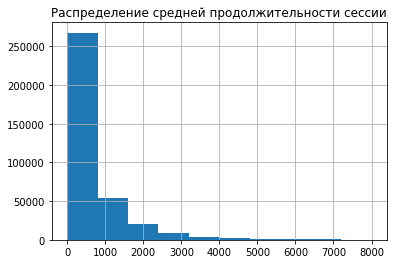

In [36]:
visits['session_duration_sec'].hist(range=(0, 8000), bins=10)
plt.title('Распределение средней продолжительности сессии')

Распрдление не очень блтзко к нормальному, поэтому лучше посмотрет моду

In [37]:
print('мода равна', int(visits['session_duration_sec'].mode())) 

мода равна 60


Судя по выводам из учебной части, данный показатель моды в 60 секунд может значить несколько вещей. Во-первых, зная о том, какие цели преслудуют пользователи на сайте, можно было бы сказать, хватает ли им этих 60 секунд. Пока предположим, что в сайте есть какие-то проблемы, которые мешают на нем задержаться


Теперь посчитаем Retention Rate(Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.) 

In [38]:
first_activity_date = visits.groupby('uid')['session_date'].min()

Cоздадим таблицу для первого посещения пользователем сайта, после чего присоединим ее к уже имеющейся.

In [39]:
visits['session_date'] = pd.to_datetime(visits['session_date'])

In [40]:
first_activity_date.name = 'first_activity_date'


In [41]:
visits = visits.join(first_activity_date,on='uid')

Получим день начала месяца, за которую произошло событие. Он станет идентификатором недели.

In [42]:
visits['first_activity_date'] = pd.to_datetime(visits['first_activity_date'])
visits['session_date'] = pd.to_datetime(visits['session_date'])

In [43]:
display(visits.head())

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,day_of_week,session_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,0,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,5,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,6,1440,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2,0,2017-12-27


In [44]:
visits['month_activity'] = visits['session_date'].astype('datetime64[M]')
visits['first_month_activity'] = visits['first_activity_date'].astype('datetime64[M]')

In [45]:
visits.reset_index()
visits['lifetime'] = visits['month_activity'] - visits['first_month_activity']
visits['lifetime'] = visits['lifetime'] / np.timedelta64(1,'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

In [46]:
visits['month_activity'] = pd.to_datetime(visits['month_activity'])
visits['first_month_activity'] = pd.to_datetime(visits['first_month_activity'])

In [47]:
visits['month_activity'] = visits['month_activity'].dt.strftime('%Y-%m')
visits['first_month_activity'] = visits['first_month_activity'].dt.strftime('%Y-%m')

In [48]:
cohorts = visits.groupby(['first_month_activity','lifetime']).agg({'uid':'nunique'}).reset_index() 

In [49]:
initial_users_count = cohorts[cohorts['lifetime'] == 0][['first_month_activity','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [50]:
cohorts = cohorts.merge(initial_users_count,on='first_month_activity')

In [51]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

In [52]:
retention_pivot = cohorts.pivot_table(index='first_month_activity',columns='lifetime',values='retention',aggfunc='sum')

In [53]:
display(retention_pivot)

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_month_activity,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
retention_pivot.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64', name='lifetime')

In [55]:
retention_pivot_from_1 = retention_pivot.drop(0, 1)

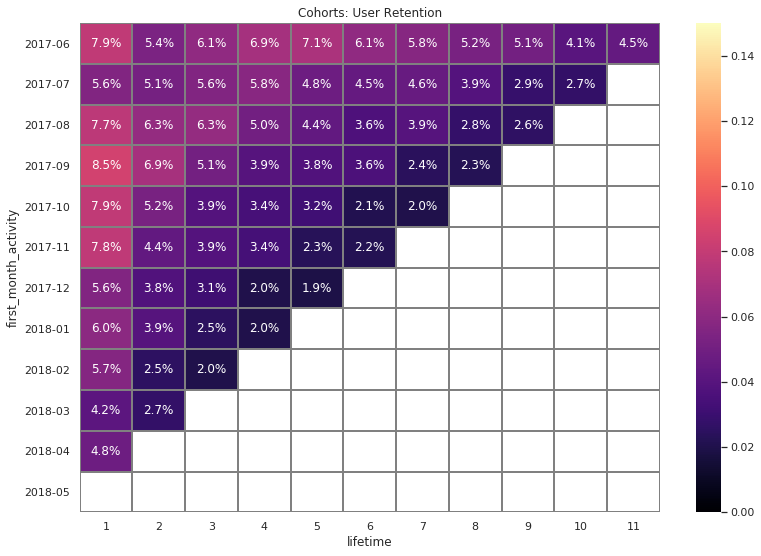

In [56]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot_from_1, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax=0.15, cmap='magma')


In [57]:
(retention_pivot_from_1[1].mean())*100

6.516659710392834

In [58]:
(retention_pivot_from_1[2].mean())*100

4.63326221636773

Да, одним словом, месячные когорты не впечатляют своим Retention Rate, уж больно они низкие, первая когорта хотя бы немного стабильна, хоть и малочисленна, но вот последующие - что-то тут не так. Вообще, в среднем, на второй месяц жизни когорты возвращается всего 6.5% людей от первоначального количества, на третий месяц уже 4.63%. Можно еще обратить внимание на то, что в 2018 году retention rate вообще катастрафический и не поднимался выше 6%. В старых когортах 2017 года динамика намного лучше, опять же, если сравнивать с изначальным количеством посетителей, то она не впечатляет, но вот стабильные 5% почти во всех месяцах жизни когорты хоть как-то, но обнадеживают.

#### Метрики электронной коммерции

Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

In [59]:
first_session = visits.groupby('uid')['start_ts'].min()
first_session.name = 'first_session'
visits = pd.merge(visits,first_session,on='uid')
first_buy = orders_2.groupby('uid')['buy_ts'].min()
first_buy.name = 'first_buy'
orders_new = pd.merge(first_session,first_buy,on='uid').reset_index()
orders_new['time_session_buy'] = (orders_new['first_buy'] - orders_new['first_session']).dt.days

In [60]:
orders_new.head()

,uid,first_session,first_buy,time_session_buy
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


In [61]:
orders_new['time_session_buy'].mean()

16.744090498233312

In [62]:
orders_new['time_session_buy'].mode()

0    0
dtype: int64

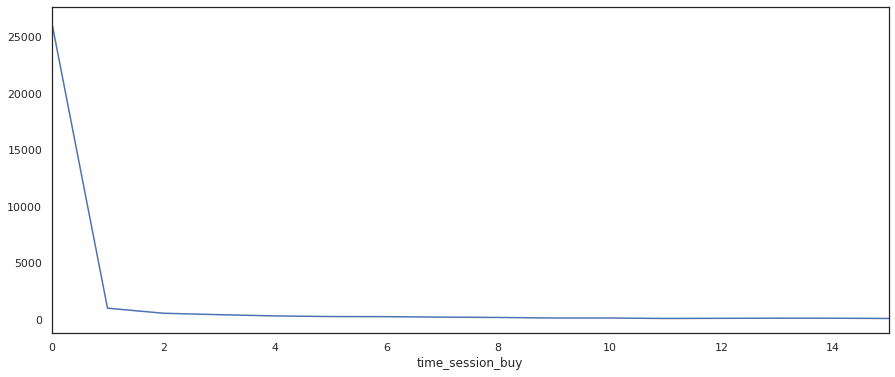

In [63]:
orders_new[orders_new['time_session_buy'] < 16].groupby('time_session_buy')['uid'].count().plot(figsize=(15,6))

Картина сильно не изменилась после того, как я исправил свой подход к соединению, тем не менее, мы видим, что хоть средняя величина, показывающая разницу между временем покупки и первым заходом равняется 16.7 дней, то вот мода уже 0 дней, что говорит о том, что почти все покупки совершаются в первый же день

In [64]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [65]:
orders['buy_date'] = orders['buy_ts'].dt.date

In [66]:
orders.head()

,buy_ts,revenue,uid,buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01


In [67]:
orders.groupby(['buy_date']).agg({'uid': 'nunique'})['uid'].mean()

127.87912087912088

In [68]:
orders.groupby(['buy_date']).agg({'revenue': 'nunique'})['revenue'].mean()

61.29945054945055

127 покупок в среднем за день на 61 единицу стоимости.

In [69]:
orders['order_month'] = orders['buy_date'].astype('datetime64[M]')

In [70]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()

In [71]:
first_orders.columns = ['uid', 'first_order_month']

In [72]:
orders_first_month = orders.groupby('uid')['order_month'].min()

In [73]:
orders_first_month.head()

uid
313578113262317    2018-01-01
1575281904278712   2017-06-01
2429014661409475   2017-10-01
2464366381792757   2018-01-01
2551852515556206   2017-11-01
Name: order_month, dtype: datetime64[ns]

In [74]:
orders_first_month.name = 'first_order_month'

In [75]:
orders_first_month = orders.join(orders_first_month, on='uid')

In [76]:
orders_first_month['first_order_month'] = pd.to_datetime(orders_first_month['first_order_month'])

In [77]:
orders_first_month['first_order_month'] = orders_first_month['first_order_month'].dt.strftime('%Y-%m')

In [78]:
orders_grouped_by_cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})

In [79]:
display(orders_grouped_by_cohorts.head())

revenue   uid
first_order_month order_month               
2017-06           2017-06-01   9557.49  2023
                  2017-07-01    981.82    61
                  2017-08-01    885.34    50
                  2017-09-01   1931.30    54
                  2017-10-01   2068.58    88

In [80]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']

In [81]:
orders_grouped_by_cohorts_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean')

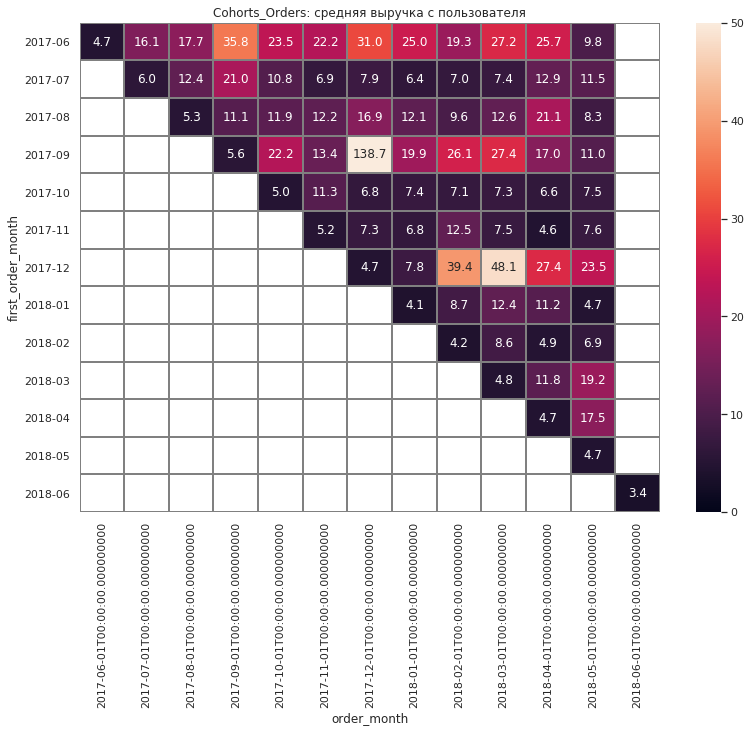

In [82]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts_Orders: средняя выручка с пользователя')
sns.heatmap(orders_grouped_by_cohorts_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmin=0, vmax=50)

Средняя выручка с пользователя растет в когортах со временем, причем это демонстрируют абсолютно все когорты, особенно по сравнению с первым месяцем активности, может быть люди все больше и больше доверяют сайту?

Применяя когортный анализ, рассчитаем среднее количество покупок на одного клиента за определённый период

In [83]:
orders.head()

,buy_ts,revenue,uid,buy_date,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [84]:
orders['order_month'] = orders['buy_date'].astype('datetime64[M]')

In [85]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()

In [86]:
first_orders.columns = ['uid', 'first_order_month']

In [87]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()

In [88]:
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [89]:
orders_first_month = pd.merge(orders,first_orders, on='uid')

In [90]:
display(orders_first_month.head())

,buy_ts,revenue,uid,buy_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [91]:
cohorts = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue': 'count'}).reset_index()

In [92]:
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [93]:
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [94]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [95]:
display(report.head())

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,2354
1,2017-06-01,2023,2017-07-01,177
2,2017-06-01,2023,2017-08-01,174
3,2017-06-01,2023,2017-09-01,226
4,2017-06-01,2023,2017-10-01,292


In [96]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')

In [97]:
report['age'] = report['age'].round().astype('int')

In [98]:
report['orders_per_buyer'] = report['revenue'] / report['n_buyers']

In [99]:
result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='orders_per_buyer', 
    aggfunc='sum').cumsum(axis=1).copy()

In [100]:
result

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,1.163618,1.251112,1.337123,1.448838,1.593178,1.700939,1.837370,1.923381,2.028176,2.103806,2.151261,2.193772
2017-07-01,1.136765,1.188768,1.251170,1.305252,1.342694,1.385335,1.417057,1.443058,1.473219,1.485699,1.513261,NaN
2017-08-01,1.118978,1.197810,1.270803,1.329927,1.391971,1.437226,1.472993,1.529927,1.563504,1.597080,NaN,NaN
2017-09-01,1.136381,1.221232,1.283611,1.347152,1.373111,1.415343,1.457187,1.478884,1.502518,NaN,NaN,NaN
2017-10-01,1.143779,1.216129,1.253456,1.281567,1.311290,1.335023,1.354839,1.383641,NaN,NaN,NaN,NaN
2017-11-01,1.179368,1.276648,1.321245,1.372948,1.406273,1.420730,1.445724,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.152635,1.214237,1.260324,1.301164,1.320785,1.344741,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.121554,1.187963,1.235102,1.254076,1.277201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.121611,1.182416,1.205149,1.224322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
print('среднее количество покупок на одного клиента за период в шесть месяцев:', round(result[5].mean(), 2))

среднее количество покупок на одного клиента за период в шесть месяцев: 1.43


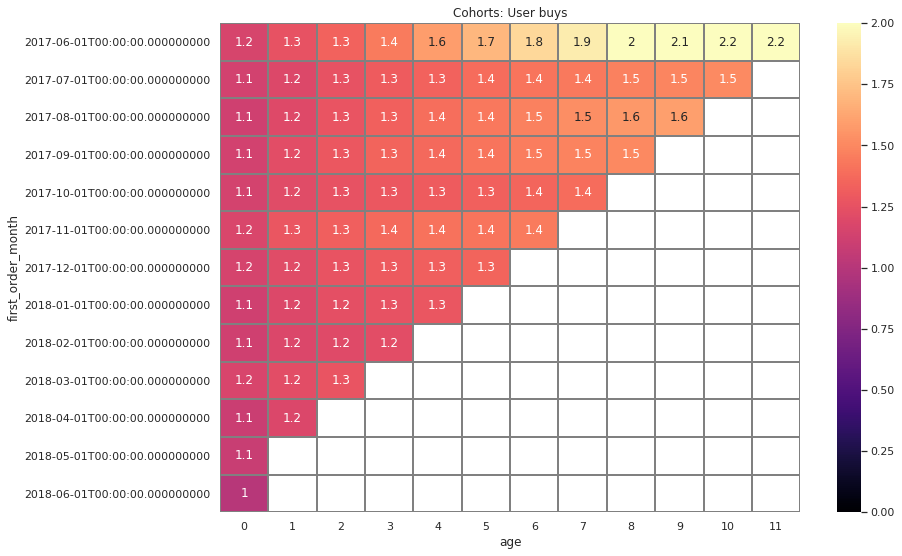

In [102]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User buys')
sns.heatmap(result, annot=True,linewidths=1, linecolor='gray', vmin=0, vmax=2, cmap='magma')

Число не большое, видимо, клиентов не особо что-то радует, что они готовы возвращаться и возвращаться за покупками.

Выясним накопительный LTV по когортам для проживших хотя бы 6 месяцев и маржинальностью в 100 процентов.

In [103]:
margin = 1

In [104]:
orders.head()

,buy_ts,revenue,uid,buy_date,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


In [105]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,day_of_week,session_duration_sec,first_activity_date,month_activity,first_month_activity,lifetime,first_session
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2,1080,2017-12-20,2017-12,2017-12,0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,0,1680,2018-02-19,2018-02,2018-02,0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,5,0,2017-07-01,2017-07,2017-07,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,6,1440,2018-03-09,2018-05,2018-03,2,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,4,1680,2018-03-09,2018-03,2018-03,0,2018-03-09 20:05:00


In [106]:
orders_first_month.head()

,buy_ts,revenue,uid,buy_date,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01


In [107]:
cohorts_1 = orders_first_month.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [108]:
report_1 = pd.merge(cohort_sizes, cohorts_1, on='first_order_month')

In [109]:
report_1['gp'] = report_1['revenue'] * margin
report_1['age'] = (report_1['order_month'] - report_1['first_order_month']) / np.timedelta64(1, 'M')
report_1['age'] = report_1['age'].round().astype('int')

In [110]:
report_1['ltv'] = report_1['gp'] / report_1['n_buyers']

In [111]:
output = report_1.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1).copy()
    
output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


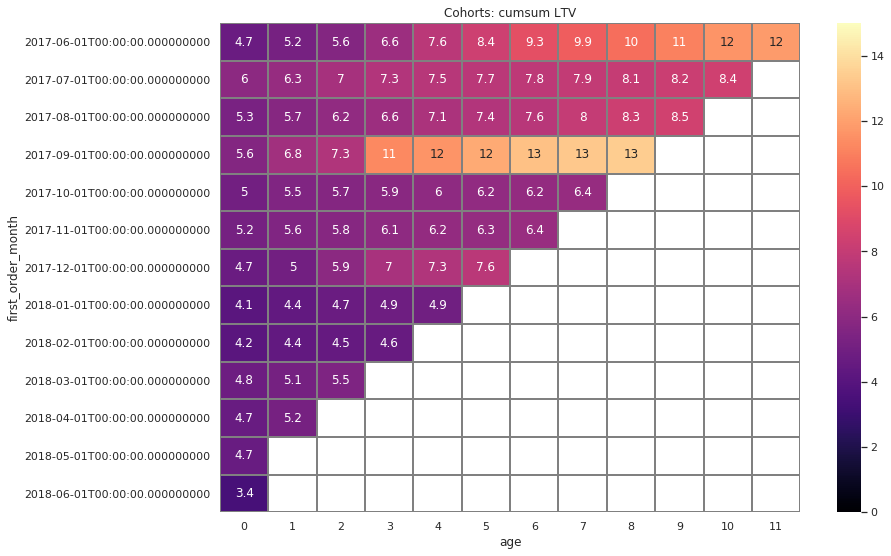

In [112]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: cumsum LTV')
sns.heatmap(output, annot=True,linewidths=1, linecolor='gray', vmin=0, vmax=15, cmap='magma')

In [113]:
output[5].mean()

7.969052630207336

Видно, что в среднем каждый покупатель принес 7.97 у.е валовой прибыли за 6 месяцев жизни его когорты. Однако, такое число во многом обязано прибыльной когорте сентября 2017 года, которая саккумулировала 13 у.е валовой стоимости уж к 7 месяцу, все же остальные держатся в районе 8 у.е

#### Маркетинговые метрики

Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам и как меняется это распределение во времени

In [114]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [115]:
costs['costs'].sum()

329131.62

Общая сумма, потраченная на маркетинг составляет 129132 у.е

In [116]:
source_split = costs.groupby('source_id').agg({'costs': 'sum'})

In [117]:
display(source_split)

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Как показывает таблица выше, больше всего расходов пошло на источник под номером 3, меньше всего на источник под номером 9

In [118]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [119]:
costs['dt_month'] = costs['dt'].dt.strftime('%Y-%m')

In [120]:
month_sum = costs.groupby('dt_month').agg({'costs': 'sum'})

In [121]:
display(month_sum)

,costs
dt_month,
2017-06,18015.00
2017-07,18240.59
2017-08,14790.54
2017-09,24368.91
2017-10,36322.88
2017-11,37907.88
2017-12,38315.35
2018-01,33518.52
2018-02,32723.03


По месяцам разбивка следующая, больше всего было потрачено на рекламу с октября по декабрь 2017 года, если вспомнить предыдущие выводы, то можно подумать, что большие затраты на рекламу привлекают больше посетителей. 

In [122]:
report_1['order_month'] = pd.to_datetime(report_1['order_month'])

In [123]:
report_1['order_month'] = report_1['order_month'].dt.strftime('%Y-%m')

In [124]:
report_1.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10,2068.58,2068.58,4,1.022531


In [125]:
costs.head()

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06
1,1,2017-06-02,62.25,2017-06
2,1,2017-06-03,36.53,2017-06
3,1,2017-06-04,55.00,2017-06
4,1,2017-06-05,57.08,2017-06


In [126]:
display(source_split)

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [127]:
first_source = visits.sort_values('start_ts').groupby('uid')['source_id'].first().reset_index()

In [128]:
first_source.head()

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [129]:
orders_with_source = orders.merge(first_source, on='uid', how='left')

In [130]:
total_revenue_by_source = orders_with_source.groupby('source_id').agg({'revenue':'sum', 'uid':'nunique'}).reset_index()

In [131]:
total_revenue_by_source.columns = ['source_id','revenue','buyers']

In [132]:
total_costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

In [133]:
result = total_revenue_by_source.merge(total_costs_by_source, on='source_id')
result['ltv'] = result['revenue'] / result['buyers']
result['cac'] = result['costs']/result['buyers']
result['romi'] = result['revenue']/result['costs']

In [134]:
result

,source_id,revenue,buyers,costs,ltv,cac,romi
0,1,31090.55,2899,20833.27,10.724577,7.186364,1.492351
1,2,46923.61,3506,42806.04,13.383802,12.209367,1.096191
2,3,54511.24,10473,141321.63,5.204931,13.493901,0.385725
3,4,56696.83,10296,61073.60,5.506685,5.931779,0.928336
4,5,52624.02,6931,51757.10,7.592558,7.467479,1.016750
5,9,5759.40,1088,5517.49,5.293566,5.071222,1.043844
6,10,4450.33,1329,5822.49,3.348631,4.381106,0.764335


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>С корректным merge средняя месячная окупаемость положительная только у 4 источников - 1, 2, 5 и 9. Девятый можем отбросить, на него было потрачено всего 5 тысяч маркетингового бюджета. 2 и 3 источник не окупаются, четвертый тоже, а на них тратится больше всего денег<div>

In [135]:
len(visits)

359400

In [142]:
orders_with_source['session_date'] = orders_with_source['buy_date']

In [145]:
orders_with_source['session_date'] = pd.to_datetime(orders_with_source['session_date'])

In [146]:
orders_3_new = pd.merge(visits, orders_with_source, on = ['uid', 'session_date'])

In [147]:
len(orders_3_new)

55028

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>Судя по длине, задвоения нет, мерж корректный? нужно соединять по этим двум столбцам - session date,- это дата сессии, uid есть uid, можно еще по источнику, на что показывае то, что источники в итоге продублировались в двух столбцах. <div>

In [148]:
orders_3_new.head()

,device,end_ts,source_id_x,start_ts,uid,session_year,session_month,session_week,session_date,day_of_week,...,first_activity_date,month_activity,first_month_activity,lifetime,first_session,buy_ts,revenue,buy_date,order_month,source_id_y
0,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,3,10,2018-03-09,4,...,2018-03-09,2018-03,2018-03,0,2018-03-09 20:05:00,2018-03-09 20:25:00,2.33,2018-03-09,2018-03-01,4
1,desktop,2017-09-04 17:56:00,4,2017-09-04 17:37:00,16007536194108375387,2017,9,36,2017-09-04,0,...,2017-09-03,2017-09,2017-09,0,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04,2017-09-01,5
2,desktop,2017-09-04 12:09:00,4,2017-09-04 11:59:00,16007536194108375387,2017,9,36,2017-09-04,0,...,2017-09-03,2017-09,2017-09,0,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04,2017-09-01,5
3,desktop,2017-09-04 12:51:00,3,2017-09-04 12:44:00,16007536194108375387,2017,9,36,2017-09-04,0,...,2017-09-03,2017-09,2017-09,0,2017-09-03 21:35:00,2017-09-04 12:46:00,2.44,2017-09-04,2017-09-01,5
4,desktop,2017-12-05 19:56:00,1,2017-12-05 19:53:00,8056418121947262981,2017,12,49,2017-12-05,1,...,2017-06-04,2017-12,2017-06,6,2017-06-04 14:17:00,2017-12-05 09:07:00,3.67,2017-12-05,2017-12-01,2


In [149]:
sources = costs['source_id'].unique()

In [150]:
sources

array([ 1,  2,  3,  4,  5,  9, 10])

In [154]:
def cohorts_romi(source):
    
    print('номер источника - ', source)
    df = orders_3_new.loc[orders_3_new['source_id_y']==source]
    df['order_month'] = df['session_date'].astype('datetime64[M]')
    first_orders = df.groupby('uid').agg({'order_month': 'min'}).reset_index()
    first_orders.columns = ['uid', 'first_order_date']
    cohort_sizes = first_orders.groupby('first_order_date').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.columns = ['first_order_date', 'n_buyers']
    orders_new = pd.merge(df,first_orders, on='uid')
    cohorts = orders_new.groupby(['first_order_date','session_date']).agg({'revenue': 'sum'}).reset_index()
    report = pd.merge(cohort_sizes, cohorts, on='first_order_date')
    
    report['age'] = (report['session_date'] - report['first_order_date']) / np.timedelta64(1, 'M')
    report['age'] = report['age'].round().astype('int')
    
    report['ltv'] = report['revenue'] / report['n_buyers']
    monthly_costs = costs[costs['source_id'] == source].groupby('dt').sum()
    report_new = pd.merge(report, monthly_costs, left_on='first_order_date', right_on='dt')
    report_new['cac'] = report_new['costs'] / report_new['n_buyers']
    report_new['romi'] = (report_new['ltv'] / report_new['cac'])
    report_new['romi'] = report_new['romi'].round(2)
    
    output = report_new.pivot_table(
        index='first_order_date', 
        columns='age', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).copy()
    
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('Cohorts: cumsum ROMI')
    sns.heatmap(output, annot=True,linewidths=1, linecolor='gray', cmap='magma')
    
    print(round(output[5].mean(), 2))
    

номер источника -  1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


8.83
номер источника -  2
2.6
номер источника -  3
0.8
номер источника -  4
3.31
номер источника -  5
3.23
номер источника -  9
3.83
номер источника -  10
4.36


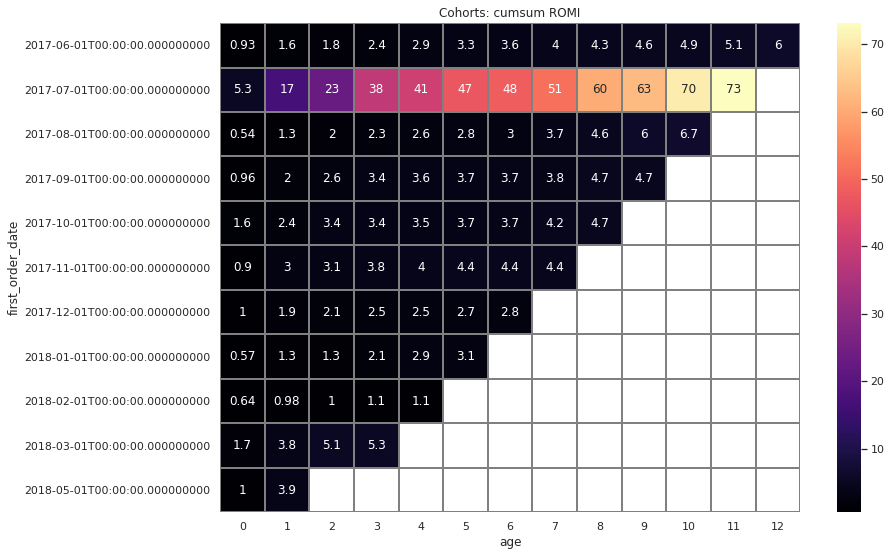

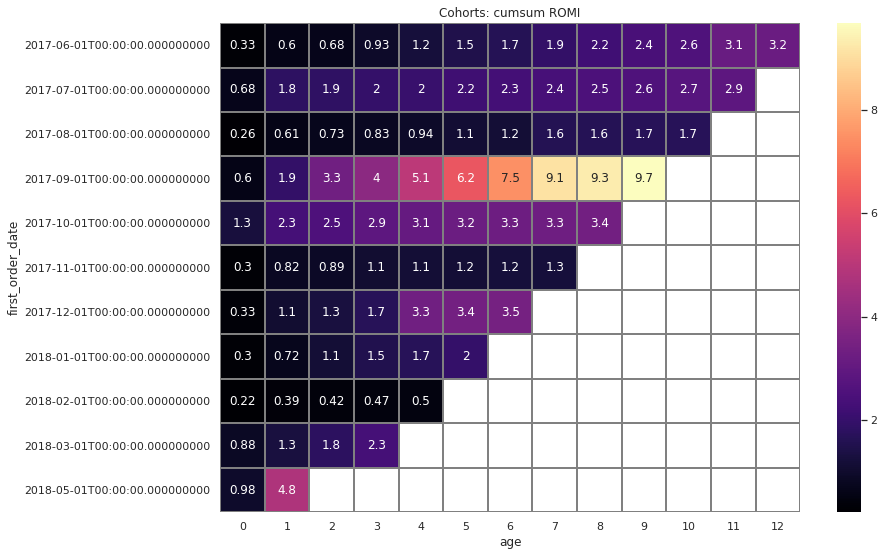

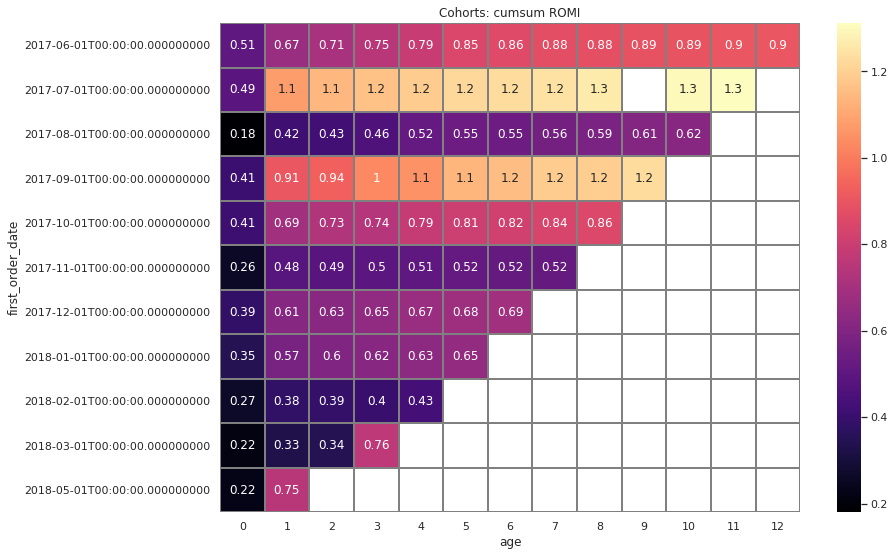

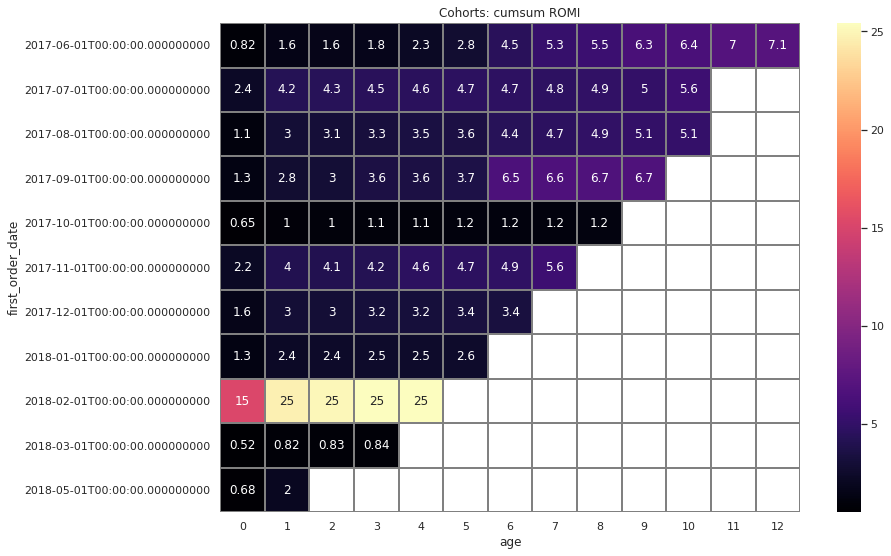

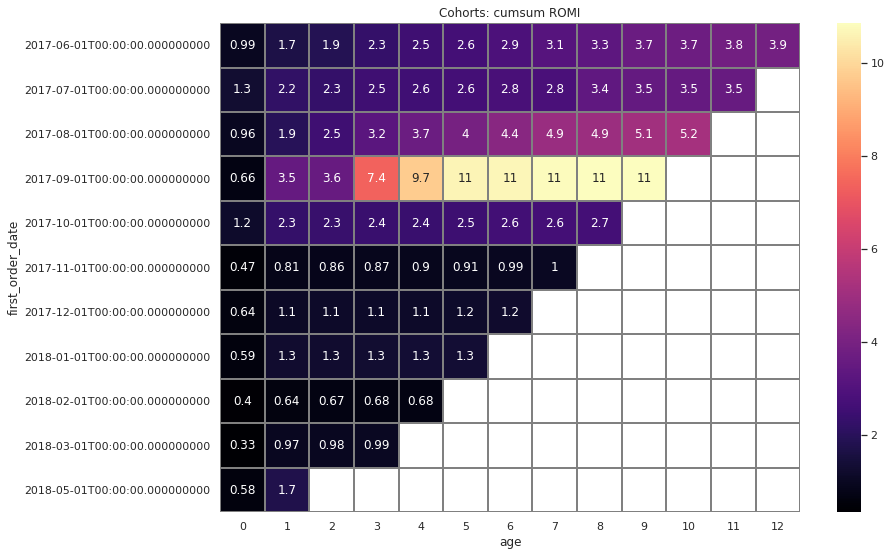

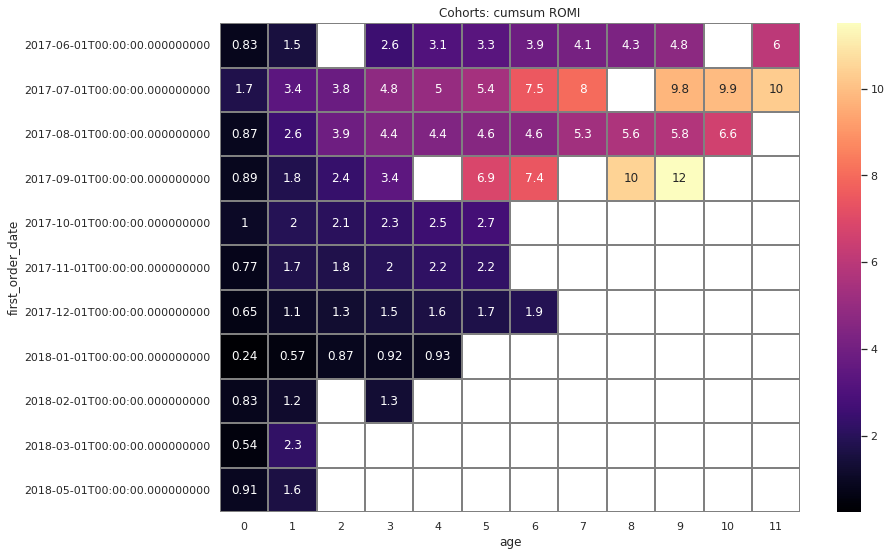

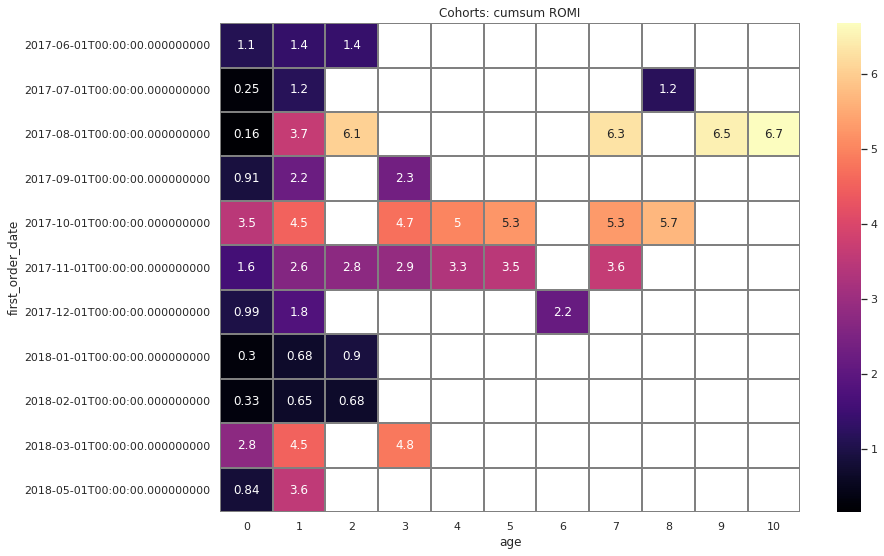

In [155]:
for source in sources:
    cohorts_romi(source)

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>Возможно, в расчетах может быть ошибка, но судя по данным, почти каждый источник окупается на 6 месяц уже точно (но важно понимать, что это среднее значение для все когорт, судя по графикам, это совсем не так для каждой в отдельнотси), кроме 3, в особенности выделяется первый источник. Все остальные, кроме 3, на который кстати и идет большая сумма денег, идут примерно вровень<div>

Определим типы устройств и их популярность.

In [156]:
devices = visits.groupby('device').agg({'uid': 'nunique'})

In [157]:
display(devices)

,uid
device,
desktop,164523
touch,71345


Посетителей с компьютерной версии больше чем в два раза.

In [158]:
device_revenue = orders_3_new.groupby('device').agg({'revenue': 'sum'})

In [159]:
display(device_revenue)

,revenue
device,
desktop,247079.45
touch,40955.90


Что мы видим, покупки совершаются почти только в компьютерной версии, видимо, мобильная не очень удобна для этого.

In [160]:
device_time = visits.groupby('device').agg({'session_duration_sec': 'mean'})

In [161]:
display(device_time)

,session_duration_sec
device,
desktop,703.946977
touch,479.619407


## Conclusion

- So-the number of unique visitors per day(DAU metric) is 907, the number of unique users per week (WAU) is 5716, the number of unique users per month (MAU) is 23228. At first glance, the data is significant, without having knowledge in this area, I do not presume to judge whether the daily attendance of 907 people is large, but 23,228 people per month do not seem to be the largest audience, but it is also unique, people may well return several times.
- That's just the answer to this question a little later-there are not very many sessions per user, only about 1.25, but it is stable in every month for 2 years. But the number of sessions is different: we see that the peak falls at the end of the year 2017, there is no place to walk, people are looking for warmer entertainment. By the way, the Retention Rate is also depressing - after the first month, God forbid 5 percent of people return from the cohort, this is very bad, just confirmed by the number of average sessions per person.
- The average session duration is 643 seconds, while the fashion is 60, the difference is huge, perhaps there are some problems in the site, and maybe the interest in its components is not high for every visitor.
- As for purchases, on average, there are 127 of them per day for 61 units of value. Moreover, the purchase is made almost immediately, a few minutes or hours after entering the site, rarely postponed for later, and the number of purchases after 10 days after the start of the session is very small.
- The average revenue per user increases dramatically from the second month of the cohort's life, if in the first month this revenue is not impressive at all, then in the second month in some cohorts it grows 7-8 times, and by the 10-11 month of life it rises on average 8-10 times compared to the first.
- Average number of purchases per customer for a period of six months: 1.43. The number is not large, apparently, customers are not particularly happy that they are ready to return and return for shopping.
- On average, for a company, one user brings 9.16 units of value for 6 months. It can also be noted that cumulative LTV grew best in the cohort that began in September 2017.

- <div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student's comment:< / b>With the correct merge, the average monthly payback is positive only for 4 sources - 1, 2, 5 and 9. We can discard the ninth one, only 5 thousand of the marketing budget was spent on it. 2 and 3 sources do not pay off, the fourth one does not, and they spend the most money on them<div>
- <div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment: < / b>And looking at the cumulative ROMI, we can say that on average, almost every source pays off for 6 months(for all cohorts, the average value), except for the 3rd, something is wrong with it <div>